In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [2]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [3]:
#@save
def plot(
    X,
    Y=None,
    xlabel=None,
    ylabel=None,
    legend=None, xlim=None,
    ylim=None, xscale='linear', yscale='linear',
    fmts=('-', 'm--', 'g-.', 'r:'), figsize=(10, 2.5), axes=None):

    """绘制数据点"""
    if legend is None:
        legend = []

    axes = axes if axes else d2l.plt.gca()

    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

    """设置matplotlib的图表大小"""
    d2l.plt.rcParams['figure.figsize'] = figsize

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

### 导数

微分的基础

这玩意在机器学习中

如果我们把这个参数增加或减少一个无穷小的量，我们可以知道损失会以多快的速度增加或减少，

定义$u = f(x) = 3x^2 - 4x$

In [4]:
def f(x):
    return 3 * x ** 2 - 4 * x

当x为2，当h无限接近于0时，使用1e-9来表示。可求得斜率为8,(保留2位小数)

In [5]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 1e-9
x0 = 2

m = float('%.2f' % numerical_lim(f, x0, h))
print(m)

8.0


根据平均变化率的公式

$$ m = \frac{y_2 - y_1 }{x_2 - x_1} $$

[x<sub>0</sub>, f(x<sub>0</sub>)]的切线的y坐标的函数如下

In [6]:
def get_m_y(x):
    return m * (x - x0) + f(x0)

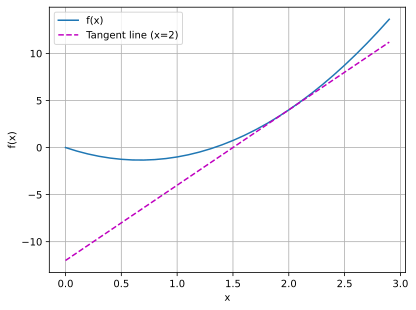

In [7]:
x = np.arange(0, 3, 0.1)
plot(x,
    [f(x), get_m_y(x)],
    'x',
    'f(x)',
    legend=['f(x)', 'Tangent line (x=2)'])